In [1]:
# To install the prerequisites, open the Anaconda Prompt and run
# (base) C:\Users\You> conda install swig
# (base) C:\Users\You> pip install tensorflow gym[box2d]

import ex3, numpy as np
from ex3 import DQN, Memory, Pendulum, Lander

help(ex3)

ModuleNotFoundError: No module named 'gym'

# Exercise 1

### Exercise 1.1

The network should have 4 inputs, one for each dimension of state(angle sine, angle cosine and angular velocity) and the fourth for the action state. The network has 2 layers by default, with 25 neurons in each layer. The output has one neuron, that outputs the Q aproximator value.

### Exercise 1.2

All rewards returned by enviromnent are negative.looking at the documentation from Gym, we could understand  how the rewards are calculated:
> -(theta^2 + 0.1*theta_dt^2 + 0.001*action^2)

We see that rewards are always negative, besides when the pendulum is at goal state, i.e., theta, theta_dt and action have value 0.

We also can understantd that the "penalty"(negative reward) is most influenced by the angle that the pendulum is, followed by the velocity theta_dt and finally suffer least influence from action

In [5]:
# TODO: Create environment
pendulum = Pendulum()

vetor_recompensa = np.empty(1000)
# TODO: Reset environment
obs = pendulum.reset()
for t in range(1000):
    # TODO: Select random action
    u = np.random.choice(pendulum.actions)
    # TODO: Step environment
    obs, r, done, info = pendulum.step(u)
    vetor_recompensa[t] = r
    print(r)
    # TODO: Render current state
    pendulum.render()
# TODO: Close environment
pendulum.close()

-8.844646627230695
-8.878294667781322
-8.85986695413772
-8.888254296216274
-8.858994690580337
-8.783820375034756
-8.821807427083796
-8.916939669363307
-9.16584382861113
-9.425514833113276
-9.853761107025944
-9.784692773596127
-9.334973748601554
-8.819134600043112
-8.344954993168145
-8.02935218050372
-7.753827408804109
-7.5431198835627775
-7.562012875493452
-7.5958733051509455
-7.840350094650129
-8.307383649711968
-8.625754505351237
-8.904939431265259
-9.135371565265157
-9.606572846025523
-10.037338846432878
-9.671655952804684
-9.399676509679233
-9.155432334868852
-8.858937087372585
-8.570599378871309
-8.396636225485882
-8.28518190295332
-8.31963458804546
-8.545631464200342
-8.680439821545091
-9.027876902380173
-9.379499844358207
-9.920226076809461
-9.804208212201575
-9.445916100033685
-9.104978011021906
-8.794393874047742
-8.526319107648469
-8.315500052679718
-8.113815798792226
-7.887356249347126
-7.69464439438569
-7.527442825185818
-7.420212492003621
-7.50057253805113
-7.5766353751246

-9.382624744851272
-12.388624134257185
-15.115447573926462
-13.894555823039655
-12.008170974262324
-9.693164528541311
-7.88865813236292
-6.273540692577955
-4.931209137929438
-3.320530947913018
-2.403267405238203
-1.9769962175608349
-1.5297034185462952
-1.485424161625405
-1.1766405493515542
-1.4545462056060314
-1.7063570932503822
-2.1785297337815237
-3.2319025924712244
-4.037262250900709
-5.56181081712357
-7.118941492894146
-9.979496816508492
-12.85019414187025
-15.255766750544636
-14.737511185950758
-12.556524530151659
-10.116898080373948
-8.222966555976292
-5.857219479321152
-4.01254104520965
-3.1237772851101075
-2.0255112144619374
-1.267843374225666
-1.0406186515134401
-0.9065385296258661
-0.7122422135576566
-0.6132554096192785
-0.4464840724776159
-0.48263175737889447
-0.4384676929295812
-0.57917014440814
-0.9591350903854224
-1.1326270809494978
-1.6159925528491783
-2.0585784586675464
-2.6646232922223914
-4.06936952413809
-5.631416785194219
-8.039206672998837
-10.51823172661216
-13.27

-5.376257573145711
-5.920854055004075
-6.7568254220356865
-8.015364559350962
-9.247112867213128
-10.225660903540243
-10.969733040598896
-9.740580972097165
-8.641247704792262
-7.718539477099219
-7.059944399785079
-6.5033152625496635
-6.201198312222137
-6.0562736821755
-5.9967833826918415
-6.168533887176746
-6.375015752529443
-6.62158401690541
-6.896139381906694
-7.35487528711476
-8.116219047152626
-8.882009954635887
-9.465948993623421
-10.212452823627874
-9.921757245592103
-9.07395910704625
-8.416751485934874
-7.798899089553744
-7.384634306434037
-6.976354140933288
-6.606359052875606
-6.510812214002722
-6.60450130978586
-6.7214989132748775
-7.120681060566286
-7.7881604584471695
-8.69482714587083
-9.555781692222903
-10.448679649146234
-9.867842289929706
-9.19293230477614
-8.341164848766903
-7.745574977490015
-7.10953828053235
-6.611976202565922
-6.129696491593521
-5.872713933866507
-5.713184702345594
-5.72753922112307
-5.917456031564007
-6.2831747868027845
-6.640180444476596
-7.211189081

# Exercise 2

In [22]:
lista_rewards = np.empty(200)

In [26]:
# TODO: Create network
dqn = DQN(3,1,[5,5])
# TODO: Create replay memory
memory = Memory(3,1)
# TODO: Create environment
pendulum = Pendulum()

gamma = 0.99
epsilon = 1
batch_size = 256

#Episódios
for e in range(200):
    # TODO: Reset environment
    state = pendulum.reset()
    
    # reset do total reward
    total_reward = 0
    
    #Trials
    for t in range(1000):
        # TODO: Select action (exercise 2.2)
        #action epsilon-greedy
        chance = np.random.random()
        Q = dqn(state, pendulum.actions).flatten()
        if chance < epsilon: # chance to choose randomly
            action = np.random.choice(pendulum.actions)
        else: # choose best action for Q_state, randomly between draws
            index = np.argwhere(Q == np.max(Q)).flatten()
            action = pendulum.actions[np.random.choice(index)]
        
        
        # TODO: Step environment
        state_p, r, done, info = pendulum.step(action)
        
        #acumulo total reward
        total_reward = total_reward + r
        
        
        # TODO: Add transition to replay memory
        memory.add(state, action, r, state_p ,done)
        
        # TODO: If at least 1000 transitions in memory, sample minibatch and learn (exercise 2.3)
        if memory.n >= 1000:
            b_state, b_actions, b_r, b_state_p, b_done = memory.sample(batch_size)
            
            Q_sp_ap = dqn(b_state_p, pendulum.actions)
            #print(Q_sp_ap)
            
            targets = np.empty(batch_size)
            for i in range(batch_size):
                if b_done[i]:
                    targets[i] = b_r[i]
                else:
                     targets[i] = b_r[i] + gamma * np.max(Q_sp_ap[i])
                    
            #print(targets)
            dqn.train(b_state, b_actions, targets)
        
        
        state = np.copy(state_p)
        
        # TODO: Render current state
        if t%1 == 0:
            pendulum.render()
            
        if done:
            break
    
        
    lista_rewards[e] = total_reward
    print(str(e) + 'Episódio  ——>   total reward: ' + str(total_reward))
    
    epsilon = epsilon * 0.97
    if epsilon < 0.05:
        epsilon = 0.05
        
# TODO: Close environment
pendulum.close()

C:\ProgramData\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


0Episódio  ——>   total reward: -1030.463170845904
1Episódio  ——>   total reward: -1172.3511439987615
2Episódio  ——>   total reward: -1185.6791170953315
3Episódio  ——>   total reward: -921.9233957550452
4Episódio  ——>   total reward: -1080.4163321218493
5Episódio  ——>   total reward: -1036.9001790329098
6Episódio  ——>   total reward: -1624.1023288143679
7Episódio  ——>   total reward: -1389.349560716546
8Episódio  ——>   total reward: -1398.0382413308994
9Episódio  ——>   total reward: -1497.246418672341
10Episódio  ——>   total reward: -1699.116934324253
11Episódio  ——>   total reward: -1455.2522327069883
12Episódio  ——>   total reward: -1113.8405958229905
13Episódio  ——>   total reward: -1009.8242906916079
14Episódio  ——>   total reward: -1235.4791764767538
15Episódio  ——>   total reward: -1174.5465101571351
16Episódio  ——>   total reward: -1353.4488318803988
17Episódio  ——>   total reward: -1186.5766002927896
18Episódio  ——>   total reward: -1146.1038629475356
19Episódio  ——>   total rew

160Episódio  ——>   total reward: -883.1716772800569
161Episódio  ——>   total reward: -397.8395975316648
162Episódio  ——>   total reward: -663.7794231472595
163Episódio  ——>   total reward: -854.9763416217917
164Episódio  ——>   total reward: -19.16826999744627
165Episódio  ——>   total reward: -402.20558279095746
166Episódio  ——>   total reward: -284.6261844010559
167Episódio  ——>   total reward: -143.15861699401646
168Episódio  ——>   total reward: -612.369104368161
169Episódio  ——>   total reward: -1018.323476163732
170Episódio  ——>   total reward: -557.2589581897903
171Episódio  ——>   total reward: -501.7604192805095
172Episódio  ——>   total reward: -715.1850950525281
173Episódio  ——>   total reward: -674.3293534910755
174Episódio  ——>   total reward: -797.0317461471969
175Episódio  ——>   total reward: -891.1058008184125
176Episódio  ——>   total reward: -804.9224993163684
177Episódio  ——>   total reward: -898.1659828051111
178Episódio  ——>   total reward: -275.56313484586167
179Episódi

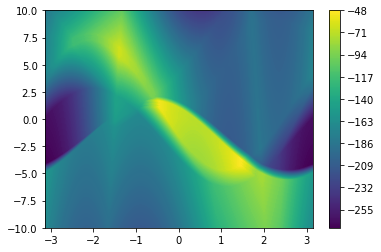

In [27]:
pendulum.plot(dqn)

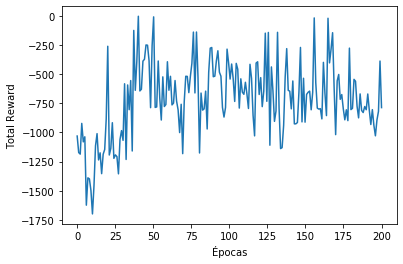

In [28]:
import matplotlib.pyplot as plt
epocas = np.linspace(0,200,200)

plt.xlabel('Épocas')
plt.ylabel('Total Reward')
plt.plot(epocas, lista_rewards)

### Exercise 2.2

When exploiting actions, we can get stuck in some suboptimal actions in the long run, but usually improves faster than when we are exploring the actions. On the other hand, when exploring, it is more likely we'll find an optimal action, and don't get stuck, but we'll not find that action often.

When implementing such an exploration schedule, we try to have "the best of both worlds", exploring in early episodes, and exploiting in the long-run, trying to maximize the reward in early stages, without harming it as the time (episodes) passes.

### Exercise 2.3

The term *gamma * max(Q(s',a'))* represents the future reward from the current state. If we are in the goal state, this should be the last state, therefore, only rewards related to the goal stateshould be considered and no future rewards are expected.

### Exercise 2.4

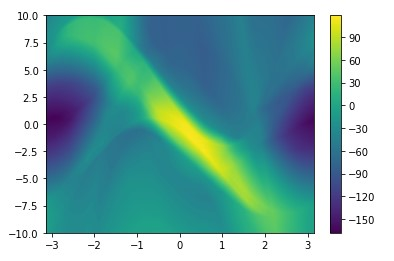
It is similar of what I would expect based on the last exercise (ex2) and many graphs we saw on classes. It is also, more faded on the top left and botton right sides, but the main shape can be seen. That shape shows that near the center is the position and velocity that has the most value, and the "path" leading to that state and action according to the color.

### Exercise 2.5

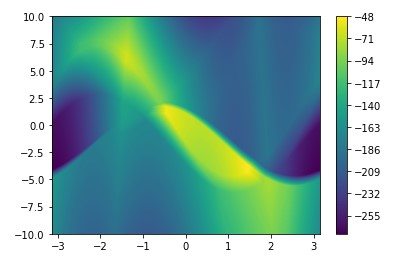
The graph seems to have more limitations, using fewer curves trying to represent the solution for the problem. The smaller network (with 5 neurons per layer) probably lost some capacity to represent a more complex problem, thus the plot, even having similar characteristics, is not as accurate as the previous one.

# Exercise 3

In [41]:
lista_rewards = np.empty(300)

In [42]:
camadas = [64,64,32]
# From exercise 2: Create network
dqn = DQN(8,1,camadas)
# TODO: Create target network
t_net = DQN(8,1,camadas)
# From exercise 2: Create replay memory
memory = Memory(8,1)

# TODO: Create environment
lander = Lander()



gamma = 0.99    # Discount rate
epsilon = 1     # epsilon greedy strategy
batch_size = 512

for e in range(300):
    # From exercise 2: Reset environment
    s = lander.reset()
    
    # reset do total reward
    total_reward = 0
    
    for t in range(1000):
        # From exercise 2: Select action (exercise 2.2)
        #action epsilon-greedy
        chance = np.random.random()
        Q = dqn(s, lander.actions).flatten()
        if chance < epsilon: # chance to choose randomly
            action = np.random.choice(lander.actions)
        else: # choose best action for Q_state, randomly between draws
            index = np.argwhere(Q == np.max(Q)).flatten()
            action = lander.actions[np.random.choice(index)]
        
        # From exercise 2: Step environment
        s_p, r, done, info = lander.step(action)
        
        ########## total reward ########
        total_reward = total_reward + r
        ################################
   
        # From exercise 2: Add transition to replay memory
        memory.add(s, action, r, s_p ,done)
        
        # From exercise 2: If at least 1000 transitions in memory, sample minibatch and learn (exercise 2.3)
        if memory.n >= 1000:
        # TODO: Use target network to calculate targets
            b_s, b_actions, b_r, b_s_p, b_done = memory.sample(batch_size)
            
#             Q_sp_ap = dqn(b_s_p, lander.actions)
            Q_sp_ap = t_net(b_s_p, lander.actions)
            
            #print(Q_sp_ap)
            
            targets = np.empty(batch_size)
            for i in range(batch_size):
                if b_done[i]:
                    targets[i] = b_r[i]
                else:
                     targets[i] = b_r[i] + gamma * np.max(Q_sp_ap[i])
                    
            #print(targets)
            dqn.train(b_s, b_actions, targets)
        
        
        s = np.copy(s_p)
    
        # From exercise 2: Render current state
        if t%1 == 0:
            lander.render()
            
        # TODO: Every 50 timesteps, copy weights to target network
        if t%200 == 0:
            t_net <<= dqn 
        
        
        if done:
            break
        
    lista_rewards[e] = total_reward
    print(str(e) + 'Episódio  ——>   total reward: ' + str(total_reward))
    
    epsilon = epsilon * 0.98
    if epsilon < 0.03:
        epsilon = 0.03
# TODO: Close environment
lander.close()

C:\ProgramData\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


0Episódio  ——>   total reward: -392.6143936026769
1Episódio  ——>   total reward: -259.32718325017936
2Episódio  ——>   total reward: -131.82726767867354
3Episódio  ——>   total reward: -177.7950842897293
4Episódio  ——>   total reward: -175.7811777773333
5Episódio  ——>   total reward: -127.9045140202663
6Episódio  ——>   total reward: -323.585253634016
7Episódio  ——>   total reward: -87.36633702250502
8Episódio  ——>   total reward: -220.66257737524415
9Episódio  ——>   total reward: -131.55108118113512
10Episódio  ——>   total reward: -108.7252964291318
11Episódio  ——>   total reward: -259.06801072174187
12Episódio  ——>   total reward: -122.68213865244152
13Episódio  ——>   total reward: -423.05565862107795
14Episódio  ——>   total reward: -282.47819076853216
15Episódio  ——>   total reward: -247.689230075104
16Episódio  ——>   total reward: -100.88818834995169
17Episódio  ——>   total reward: -287.89842954379594
18Episódio  ——>   total reward: -157.28779878066376
19Episódio  ——>   total reward: 

159Episódio  ——>   total reward: -11.424651349632924
160Episódio  ——>   total reward: -188.43954732269057
161Episódio  ——>   total reward: -119.06589493019406
162Episódio  ——>   total reward: -38.60318599255777
163Episódio  ——>   total reward: -87.88208753390893
164Episódio  ——>   total reward: -71.01416288695278
165Episódio  ——>   total reward: -290.10729232546663
166Episódio  ——>   total reward: -58.294374425986874
167Episódio  ——>   total reward: -98.42523017416228
168Episódio  ——>   total reward: -40.859420560428816
169Episódio  ——>   total reward: -96.57040541724677
170Episódio  ——>   total reward: -49.137395089710026
171Episódio  ——>   total reward: 233.29439588336334
172Episódio  ——>   total reward: 212.53953879032193
173Episódio  ——>   total reward: -30.00377696875911
174Episódio  ——>   total reward: -88.63799115402014
175Episódio  ——>   total reward: -190.16840971936867
176Episódio  ——>   total reward: 12.570671730670274
177Episódio  ——>   total reward: -50.95874209224955
178E

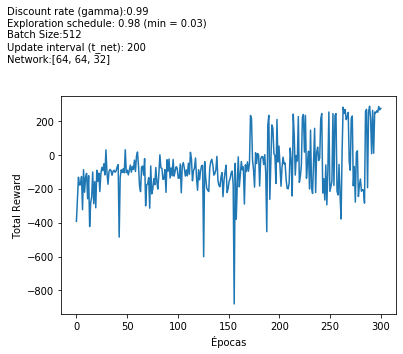

In [46]:
import matplotlib.pyplot as plt
eixo = np.linspace(0,300,300)

plt.xlabel('Épocas')
plt.ylabel('Total Reward')
plt.figtext(x = 0, y = 1, s = ('Discount rate (gamma):' +  str(gamma) + 
                               '\nExploration schedule: 0.98 (min = 0.03)' +
                               '\nBatch Size:' + str(batch_size) +
                               '\nUpdate interval (t_net): 200 '
                               '\nNetwork:' + str(camadas)
                              ))

plt.plot(eixo, lista_rewards)

<StemContainer object of 3 artists>

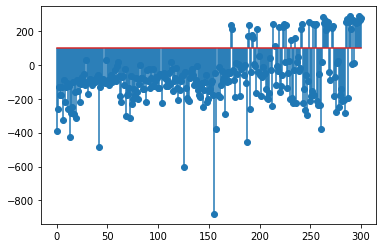

In [45]:
plt.stem(eixo, lista_rewards, bottom = 100, use_line_collection = True)

### Exercise 3.1

We can run the algorithm, but the ship didn't learn what we expected it to learn (land). In the end of the simulation, it started to choose mainly one action, always crashing and the total reward was in the range of -400 to -600.

### Exercise 3.3

keeping parameter standard (base parameters):
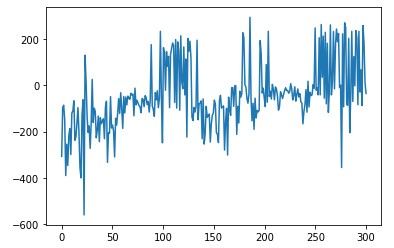

Discount rate (gamma): 0.99<br>
Exploration schedule: 0.9 (min = 0.01)<br>
Batch Size: 256<br>
Update interval (t_net): 50 steps<br>
Network: (25,25)
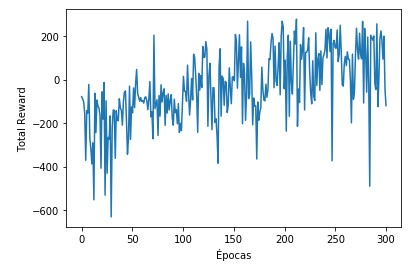


Changing the exploration schedule and making it explore for a smaller amount of time, seems to make the lander converge a bit faster to values above 100, but the maximum value reached seems to be a bit smaller as well.



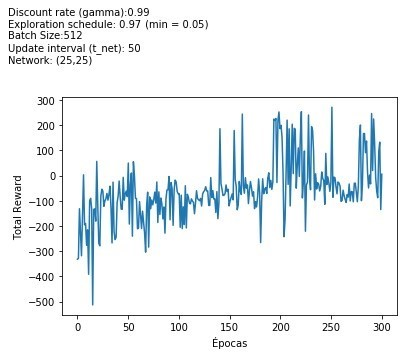
Changing only the batch size, made the results a bit more stable. But the convergence of total reward around apisode 250 should be better compared to our base parameters. Maybe it has to do with the solution stochasticity.

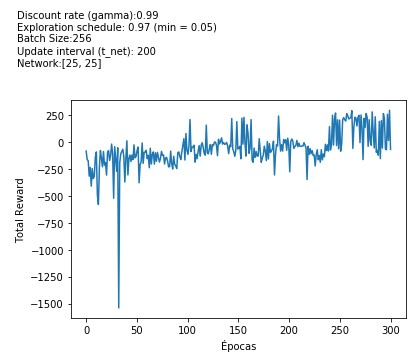
Changing only the target network update interval, made the total reward values more stable as well. It is important to note that the graph scale in y axis is bigger, but even like so, the values keep a more "controled" behavior.

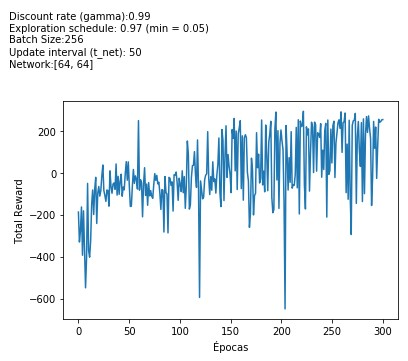
Trying to change the network, we can observe that total reward started to get values near 200 around episode 150, which is earlier than before (with no changes). This probably tells us that a more complex network is better than the base network (with 25 neurons in each layer).

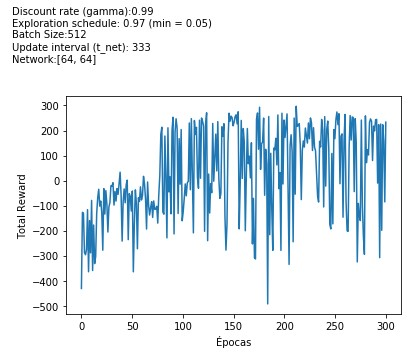

Trying to combine the changes made in previous runs, a better result could be achieved when changing the batch size, the update interval for tareget network and the netowrk used to learn (dqn). The result converged earlier than before (around 60-70 episodes) and the values of total reward oscilated less.

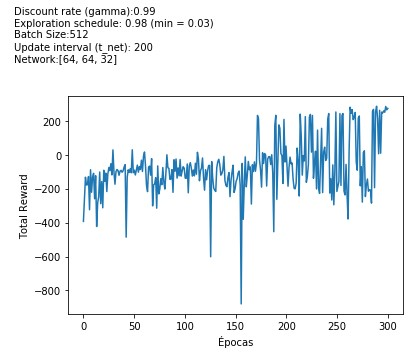
One last attempt was made, trying to mprove the results, changing mainly the network a bit more, and the exploration schedule. It took more time to start converging, but near the end of 300 apisodes, the results seems to be more consistent. Probably with more episodes, it would be clear if it was in fact an improvement or the other way around.

The best result was achieved with a network with more neurons in both layers, an increased "wait" to update the target network and a bigger batch size. Experiments with more layers were made, but the results were worse. Also, changing the discount rate (gamma)  resulted in worse total rewards.